# Heart Dataset 

### Done by: Wee Kiam, Zu, Sophia, Dawn

#### Initial Data has 76 variable. 

#### This database contains 76 attributes, but all published experiments refer to using a subset of 14 of them. 

In particular, the Cleveland database is the only one that has been used by ML researchers to this date.

The "target" field refers to the presence of heart disease in the patient. 

It is integer valued 0 = no/less chance of heart attack and 1 = more chance of heart attack

#### Attribute Information:
1) age 

2) sex 

3) chest pain type (4 values) 

4) resting blood pressure 

5) serum cholestoral in mg/dl 

6) fasting blood sugar > 120 mg/dl 

7) resting electrocardiographic results (values 0,1,2) 

8) maximum heart rate achieved 

9) exercise induced angina 

10) oldpeak = ST depression induced by exercise relative to rest 

11) the slope of the peak exercise ST segment 

12) number of major vessels (0-3) colored by flourosopy 

13) thal: 0 = normal; 1 = fixed defect; 2 = reversable defect 

14) target: 0= less chance of heart attack 1= more chance of heart attack


In [1]:
from statsmodels.discrete.discrete_model import Probit
from statsmodels.discrete.discrete_model import Logit
from sklearn.model_selection import train_test_split
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
%matplotlib inline
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [2]:
data = pd.read_csv('heart.csv')
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


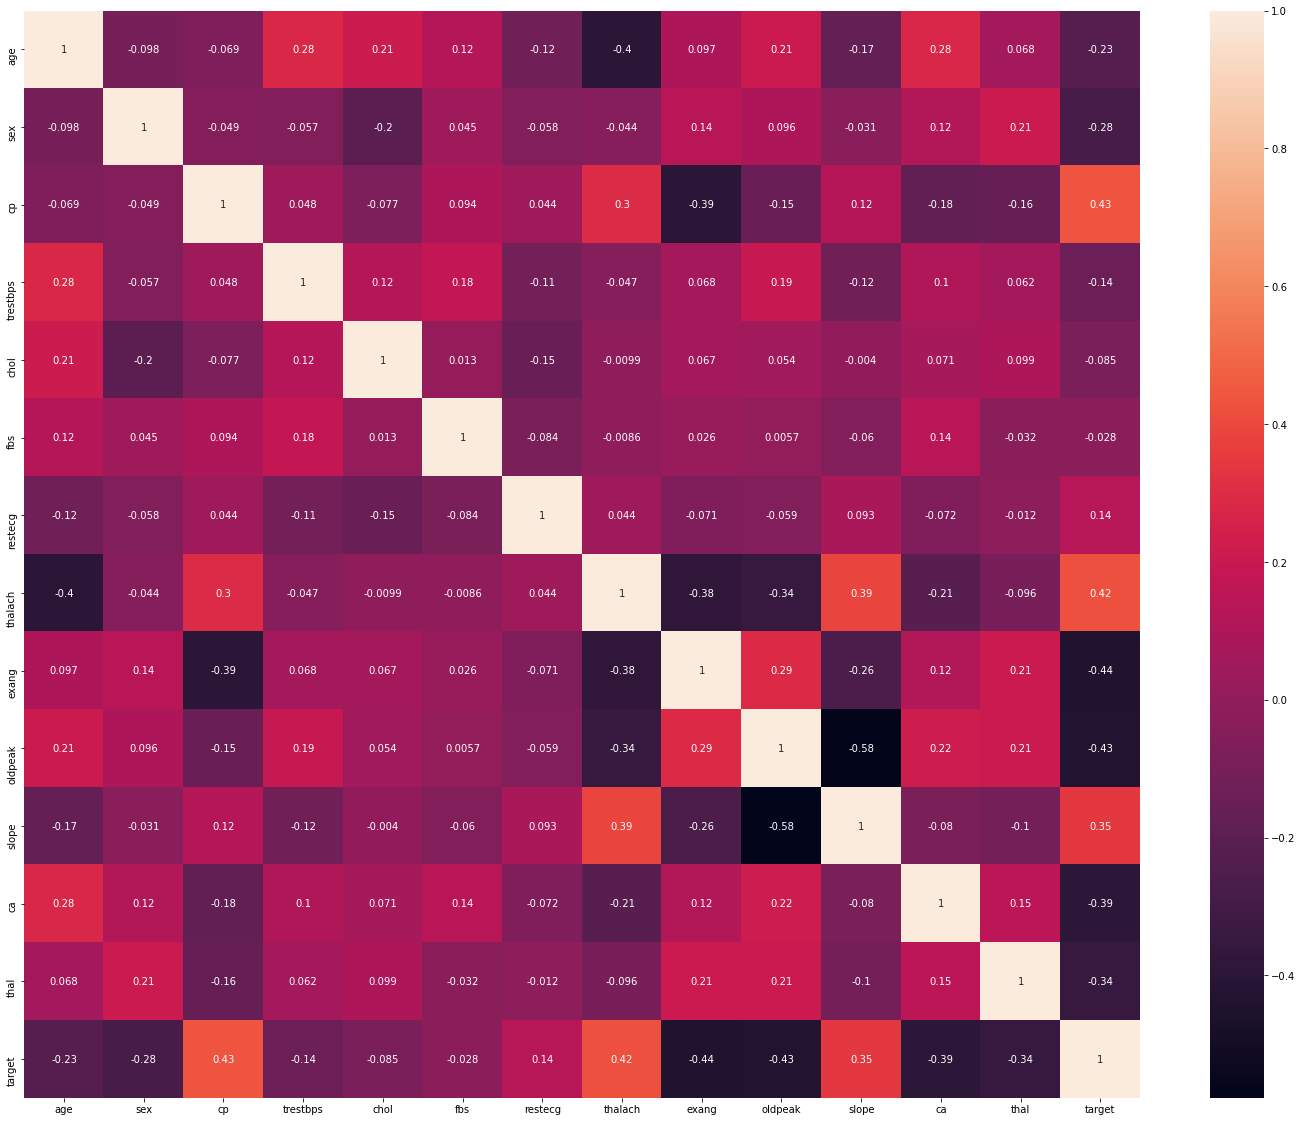

In [3]:
fig = plt.figure(figsize=(25, 20))
sns.heatmap(data.corr(), annot=True)
plt.savefig("Heatmap.png")

### LOGIT



In [4]:
data = pd.read_csv('heart.csv')
data.columns

x = data.iloc[:, 0:-1]
y = data.iloc[:, -1]


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42, shuffle=True)

model = Logit(y_train, x_train)
logit_model = model.fit()
print(logit_model.summary())

Optimization terminated successfully.
         Current function value: 0.348581
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                 target   No. Observations:                  227
Model:                          Logit   Df Residuals:                      214
Method:                           MLE   Df Model:                           12
Date:                Tue, 27 Jul 2021   Pseudo R-squ.:                  0.4940
Time:                        20:40:38   Log-Likelihood:                -79.128
converged:                       True   LL-Null:                       -156.37
Covariance Type:            nonrobust   LLR p-value:                 6.954e-27
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
age            0.0130      0.021      0.621      0.535      -0.028       0.054
sex           -1.5043      0.

#### Check for imbalanced data -  our data is balanced

In [5]:
print(pd.crosstab(data["sex"], data["target"], margins = True))

target    0    1  All
sex                  
0        24   72   96
1       114   93  207
All     138  165  303


#### 7 variables that have p-value less than 0.05 - 'sex','cp','restecg','thalach','oldpeak','ca','thal'

#### We check on the 7 variables's coefficient and realised that only 'cp', 'restecg' and 'thalach' are applicable as their result is more than 1.

#### We also realised that only those with positive coefficients are eventually accepted.

In [6]:
#'sex','cp','restecg','thalach','oldpeak','ca','thal'

import math

print(f"'sex' coefficient is : {math.exp(-1.5010)}")
print(f"'cp' coefficient is : {math.exp(1.0481)}")
print(f"'restecg' coefficient is : {math.exp(0.9497)}")
print(f"'thalach' coefficient is : {math.exp(0.0368)}")
print(f"'oldpeak' coefficient is : {math.exp(-0.7413)}")
print(f"'ca' coefficient is : {math.exp(-0.8279)}")
print(f"'thal' coefficient is : {math.exp(-0.9940)}")


'sex' coefficient is : 0.22290714151618243
'cp' coefficient is : 2.8522267357338915
'restecg' coefficient is : 2.5849340627633515
'thalach' coefficient is : 1.0374855029864662
'oldpeak' coefficient is : 0.4764940704174692
'ca' coefficient is : 0.43696595198488275
'thal' coefficient is : 0.37009335291196127


### Probit

In [7]:
data = pd.read_csv('heart.csv')
data.columns

x = data.iloc[:, 0:-1]
y = data.iloc[:, -1]


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42, shuffle=True)

model = Probit(y_train, x_train)
Probit_model = model.fit()
print(Probit_model.summary())

Optimization terminated successfully.
         Current function value: 0.349408
         Iterations 7
                          Probit Regression Results                           
Dep. Variable:                 target   No. Observations:                  227
Model:                         Probit   Df Residuals:                      214
Method:                           MLE   Df Model:                           12
Date:                Tue, 27 Jul 2021   Pseudo R-squ.:                  0.4928
Time:                        20:40:38   Log-Likelihood:                -79.316
converged:                       True   LL-Null:                       -156.37
Covariance Type:            nonrobust   LLR p-value:                 8.291e-27
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
age            0.0067      0.012      0.542      0.588      -0.018       0.031
sex           -0.8425      0.

#### 7 variables that have p-value less than 0.05 - 'sex','cp','restecg','thalach','oldpeak','ca','thal'

#### We check on the 7 variables's coefficient and realised that only 'cp', 'restecg' and 'thalach' are applicable as their result is more than 1.

#### We also realised that only those with positive coefficients are eventually accepted. - Same as Logit

In [8]:
#'sex','cp','restecg','thalach','oldpeak','ca','thal'

import math
print(f"'sex' coefficient is : {math.exp(-0.8424)}")
print(f"'cp' coefficient is : {math.exp(0.5696)}")
print(f"'restecg' coefficient is : {math.exp(0.5395)}")
print(f"'thalach' coefficient is : {math.exp(0.0200)}")
print(f"'oldpeak' coefficient is : {math.exp(-0.4222)}")
print(f"'ca' coefficient is : {math.exp(-0.4522)}")
print(f"'thal' coefficient is : {math.exp(-0.5098)}")



'sex' coefficient is : 0.4306756605050928
'cp' coefficient is : 1.767559886055666
'restecg' coefficient is : 1.715149073218878
'thalach' coefficient is : 1.0202013400267558
'oldpeak' coefficient is : 0.6556029056993695
'ca' coefficient is : 0.636226911617377
'thal' coefficient is : 0.6006156899387407


### Marginal Effect 

In [9]:
mfx = Probit_model.get_margeff()
print(mfx.summary())

       Probit Marginal Effects       
Dep. Variable:                 target
Method:                          dydx
At:                           overall
                dy/dx    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
age            0.0013      0.002      0.543      0.587      -0.003       0.006
sex           -0.1653      0.054     -3.060      0.002      -0.271      -0.059
cp             0.1004      0.021      4.827      0.000       0.060       0.141
trestbps      -0.0010      0.001     -0.775      0.438      -0.004       0.002
chol          -0.0002      0.000     -0.478      0.632      -0.001       0.001
fbs            0.0066      0.071      0.093      0.926      -0.132       0.145
restecg        0.0948      0.043      2.183      0.029       0.010       0.180
thalach        0.0026      0.001      2.555      0.011       0.001       0.005
exang         -0.1282      0.051     -2.524      0.012    

### GLM 

#### GLM shows that Probit is the best fit for our selected data.
###### GLM family - logit, probit, cauchy, log, cloglog, identity

In [10]:
import statsmodels.api as sm
from statsmodels.formula.api import glm
sm.families.Binomial.links

results1 = glm('target ~  cp + restecg + thalach',data=data, family=sm.families.Binomial(sm.families.Binomial.links[1]),).fit()
results1.summary()

<ipython-input-10-2be00a684758>:5: DeprecationWarning: Calling Family(..) with a link class as argument is deprecated.
Use an instance of a link class instead.
  results1 = glm('target ~  cp + restecg + thalach',data=data, family=sm.families.Binomial(sm.families.Binomial.links[1]),).fit()


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 target   No. Observations:                  303
Model:                            GLM   Df Residuals:                      299
Model Family:                Binomial   Df Model:                            3
Link Function:                 probit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -158.98
Date:                Tue, 27 Jul 2021   Deviance:                       317.97
Time:                        20:40:39   Pearson chi2:                     332.
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.8264      0.597     -6.410      0.000      -4.996      -2.656
cp             0.4730      0.082      5.737      0.000       0.311       0.635
restecg        0.3258      0.152      2.139      0.032       0.027       0.624
thalach        0.0222      0.004      5.655      0.000       0.015       0.030
==============================================================================
"""

#### We decided to train the model based on the 3 variables that have been picked.

#### Although the accuracy, precision and recall are above 80%, we want to try to reduce the false positive and false negative even further.

In [11]:
#split dataset
x = ['cp','restecg','thalach']
X = data[x] 
y = data.target 

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, shuffle=True)

In [13]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [14]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=42)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [15]:
y_pred = classifier.predict(X_test)

Text(0.5, 257.44, 'Predicted target')

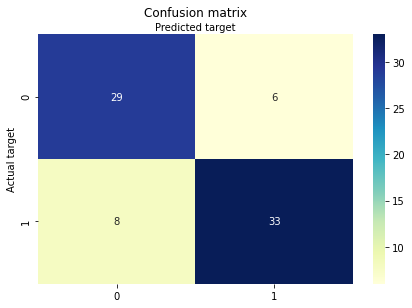

In [16]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual target')
plt.xlabel('Predicted target')

In [17]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.8157894736842105
Precision: 0.8461538461538461
Recall: 0.8048780487804879


In [18]:
print("Root Mean Squared Error: ", np.sqrt(mean_squared_error(y_test, y_pred)))
print("Mean Squared Error: ", mean_squared_error(y_test, y_pred))
print("Mean Absolute Error: ", mean_absolute_error(y_test, y_pred))

Root Mean Squared Error:  0.42919753763947605
Mean Squared Error:  0.18421052631578946
Mean Absolute Error:  0.18421052631578946


### Probit for 3 variables 
#### This was done to compare it with multi-linear regression

In [19]:
data = pd.read_csv('heart.csv')
data.columns

x = ['cp','restecg','thalach']
X = data[x] 
y = data.target 


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, shuffle=True)

model = Probit(y_train, X_train)
Probit_model = model.fit()
print(Probit_model.summary())

Optimization terminated successfully.
         Current function value: 0.602743
         Iterations 5
                          Probit Regression Results                           
Dep. Variable:                 target   No. Observations:                  227
Model:                         Probit   Df Residuals:                      224
Method:                           MLE   Df Model:                            2
Date:                Tue, 27 Jul 2021   Pseudo R-squ.:                  0.1250
Time:                        20:40:39   Log-Likelihood:                -136.82
converged:                       True   LL-Null:                       -156.37
Covariance Type:            nonrobust   LLR p-value:                 3.236e-09
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
cp             0.5226      0.090      5.791      0.000       0.346       0.700
restecg        0.1368      0.

### PCA

#### As we had 13 variables, we decided to run PCA to reduce the dimensions in our data. 
#### We will show you a 'Before' and 'After' PCA result.

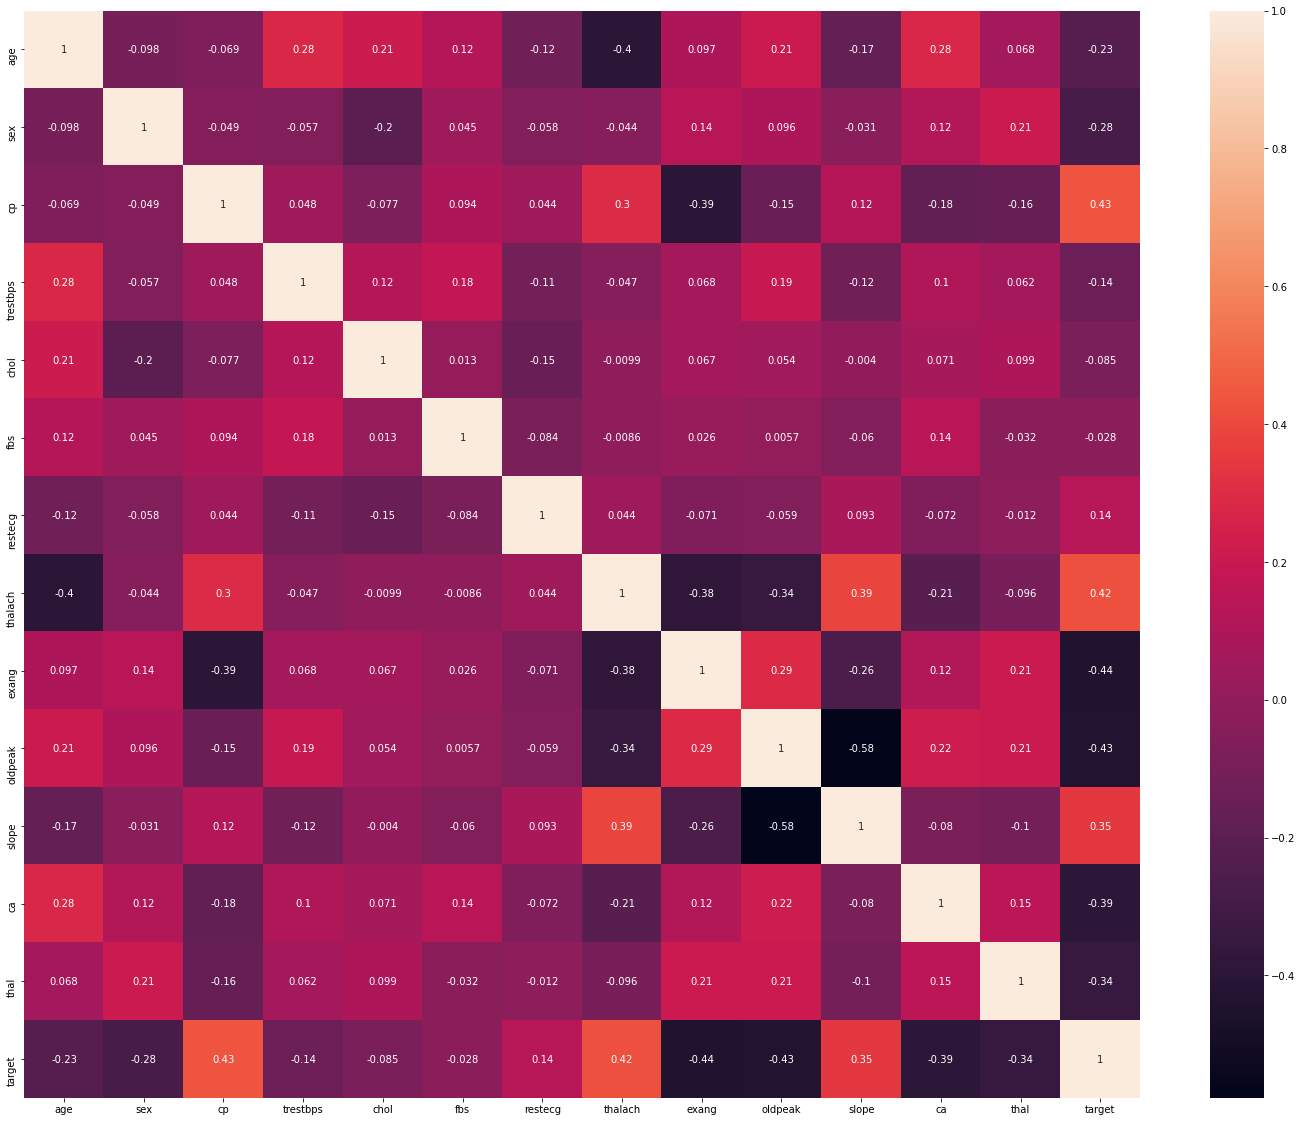

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(25, 20))
sns.heatmap(data.corr(), annot=True)
plt.savefig("Heatmap.png")

### Before PCA

Train accuracy: 0.89
Test accuracy: 0.8

Test confusion_matrix


Text(33.0, 0.5, 'True')

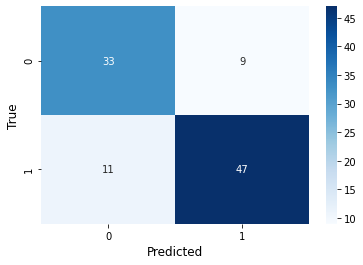

In [33]:
# Define Feature matrix and Target vector
X = data.iloc[:, 0:-1]
y = data.iloc[:, -1]

# Make train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, shuffle=True, random_state=42)

# Initialize the logistic regression model
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(max_iter=2500)

# Train the model
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test) # Predictions
y_true = y_test # True values

# Measure accuracy
from sklearn.metrics import accuracy_score
import numpy as np
print("Train accuracy:", np.round(accuracy_score(y_train, clf.predict(X_train)), 2))
print("Test accuracy:", np.round(accuracy_score(y_true, y_pred), 2))

# Make the confusion matrix
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_true, y_pred)
print("\nTest confusion_matrix")
sns.heatmap(cf_matrix, annot=True, cmap='Blues')
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('True', fontsize=12)

### After PCA

Eigenvalues:
[2.772176   1.54178039 1.22688342 1.18505659 1.02535054 0.97322784
 0.86562678 0.77851473 0.72130605 0.62362837 0.53186008 0.42454351
 0.37309206]

Variances (Percentage):
[21.25405312 11.82070772  9.40641769  9.08573471  7.86128108  7.46166051
  6.63669175  5.9688106   5.53019619  4.78130912  4.07772896  3.25494139
  2.86046716]



Text(0, 0.5, 'Explained variance (%)')

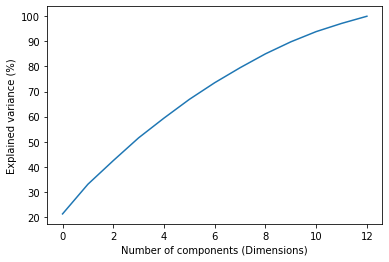

In [22]:
# Do feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_scaled = sc.fit_transform(X)

# Apply PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=None)
pca.fit(X_scaled)

# Get the eigenvalues
print("Eigenvalues:")
print(pca.explained_variance_)
print()

# Get explained variances
print("Variances (Percentage):")
print(pca.explained_variance_ratio_ * 100)
print()

# Make the scree plot
plt.plot(np.cumsum(pca.explained_variance_ratio_ * 100))
plt.xlabel("Number of components (Dimensions)")
plt.ylabel("Explained variance (%)")

          0         1         2         3         4         5         6  \
0  0.624111  2.321270  2.474673  2.676239  0.375253  1.713567 -0.120352   
1 -0.455988 -0.957351  1.139595  2.426838  2.273767 -0.787861 -0.081513   
2 -1.828805  0.042885 -0.452229  0.406415  0.867802  0.767551 -0.104852   
3 -1.716006 -0.495337  0.030631 -0.112162 -0.235598 -0.502665 -0.142754   
4 -0.371356  0.301156 -2.841069 -0.809042  0.011389 -0.085495  1.415596   

          7  
0  0.736557  
1  1.535384  
2 -0.063523  
3 -0.177462  
4  0.607134  

Size: 
(303, 8)


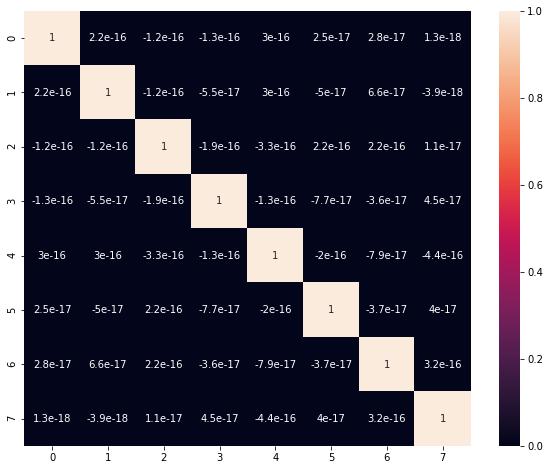

In [23]:
# Do feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_scaled = sc.fit_transform(X)

# Apply PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=8)
X_pca = pca.fit_transform(X_scaled)

# Get the transformed dataset
X_pca = pd.DataFrame(X_pca)
print(X_pca.head())
print("\nSize: ")
print(X_pca.shape)

fig = plt.figure(figsize=(10, 8))
sns.heatmap(X_pca.corr(), annot=True)

Train accuracy: 0.83
Test accuracy: 0.83

Test confusion_matrix


Text(33.0, 0.5, 'True')

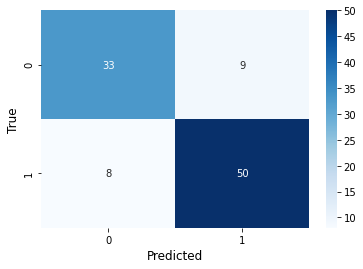

In [34]:
# Make train and test sets
from sklearn.model_selection import train_test_split
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=0.33, shuffle=True, random_state=42)

# Initialize the logistic regression model
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(max_iter=2500)

# Train the model
clf.fit(X_train_pca, y_train)

# Make predictions
y_pred = clf.predict(X_test_pca) # Predictions
y_true = y_test # True values

# Measure accuracy
from sklearn.metrics import accuracy_score
import numpy as np
print("Train accuracy:", np.round(accuracy_score(y_train, clf.predict(X_train_pca)), 2))
print("Test accuracy:", np.round(accuracy_score(y_true, y_pred), 2))

# Make the confusion matrix
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_true, y_pred)
print("\nTest confusion_matrix")
sns.heatmap(cf_matrix, annot=True, cmap='Blues')
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('True', fontsize=12)

#### We found a way to optimise the number of dimensions for PCA if the dataset is a large one.
#### This code tells us the optimal number of dimensions required to preserve 90% of variance.

In [25]:
pca= PCA()
pca.fit(X_train_pca)
cumsum = np.cumsum(pca.explained_variance_ratio_)
dim = np.argmax(cumsum >= 0.90) + 1
print('The number of dimensions required to preserve 90% of variance is',dim)

The number of dimensions required to preserve 90% of variance is 7


### Linear Regression with 3 variables

In [26]:
x = ['cp','restecg','thalach']
X = data[x] 
y = data.target 

In [27]:
import pandas as pd
from sklearn import linear_model
import statsmodels.api as sm


regr = linear_model.LinearRegression()
regr.fit(X,y)


print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)
 
model = sm.OLS(y, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print(print_model)

Intercept: 
 -0.7022891106716163
Coefficients: 
 [0.16190346 0.10275672 0.00692312]
                                 OLS Regression Results                                
Dep. Variable:                 target   R-squared (uncentered):                   0.659
Model:                            OLS   Adj. R-squared (uncentered):              0.655
Method:                 Least Squares   F-statistic:                              193.0
Date:                Tue, 27 Jul 2021   Prob (F-statistic):                    1.08e-69
Time:                        20:40:43   Log-Likelihood:                         -175.02
No. Observations:                 303   AIC:                                      356.0
Df Residuals:                     300   BIC:                                      367.2
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err    

In [28]:
print(math.exp(0.1619))
print(math.exp(0.1028))
print(math.exp(0.00695))

1.1757426611759727
1.1082697329625424
1.006974207297745


In [29]:
x = ['cp','restecg','thalach']
X = data[x] 
y = data.target 

# Make train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, shuffle=True, random_state=42)

# Initialize the linear regression model
from sklearn.linear_model import LinearRegression
clf = LinearRegression()

# Train the model
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test) # Predictions
y_true = y_test # True values

In [30]:
print("Root Mean Squared Error: ", np.sqrt(mean_squared_error(y_true, y_pred)))
print("Mean Squared Error: ", mean_squared_error(y_true, y_pred))
print("Mean Absolute Error: ", mean_absolute_error(y_true, y_pred))

Root Mean Squared Error:  0.3947476132975932
Mean Squared Error:  0.1558256782041462
Mean Absolute Error:  0.34052774797604835


# Conclusion: 


## We will use Logistic Regression because:
### 1) Both pseudo R^2 and R^2 are relatively high, hence we look at other deciding factors.

### 2) Errors:
###### <u> <b> Logistic </b> </u>
Root Mean Squared Error:  0.4291975376394760
<br>Mean Squared Error:  0.18421052631578946
<br> Mean Absolute Error:  0.18421052631578946

###### <u> Linear </u>
Root Mean Squared Error:  0.3947476132975932
<br> Mean Squared Error:  0.1558256782041462
<br> Mean Absolute Error:  0.34052774797604835

### 3) We can look at Log-Likelihood values. 
 Linear (3 variables): -175.02
<br> Logistic(GLM): -158.98 / Logistic(Probit with 3 variables): -136.82

### 4) Overall, our dataset has a target that is Binary hence it makes sense to use logistic regression.



## Also, PCA helps us to reduce dimensions and improve accuracy of our model.